# Sales Data Analysis – Mid Project

## Introduction
This project is part of the Data Science Diploma mid project.
The main objective of this project is to analyze a sales dataset
and extract meaningful insights using data analysis and visualization techniques.

The dataset contains sales transaction records, including information
about products, quantities, prices, customers, regions, and dates.

In this project, I will:
- Load and understand the dataset structure
- Assess data quality and perform data cleaning
- Explore the data using statistical analysis and visualizations
- Answer business-related questions based on the analysis

## Analysis Questions

The following questions are designed to analyze the sales dataset from
different business perspectives. Each question will be answered using
data analysis techniques and visualized using appropriate charts,
followed by a brief conclusion.

### Q1. What are the top 10 products by total sales amount?
This question helps identify the best-performing products in terms of revenue.

### Q2. Which regions generate the highest total sales?
This question aims to understand the geographical distribution of sales.

### Q3. How do total sales change over time?
This question helps analyze sales trends and identify any seasonality patterns.

### Q4. Which sales channel generates higher total revenue?
This question is showing the sales or total revenue by sales channel

### Q5. Which product categories contribute the most to total sales?
This question helps determine the most valuable product categories.

### Q6. What is the average order value per region?
This question focuses on comparing customer purchasing behavior across regions.

## Data Understanding and Initial Inspection

In this section, I perform an initial inspection of the dataset to
understand its structure, columns, data types, and overall quality
before starting the data cleaning process.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import plotly.express as px

# Load the dataset
df = pd.read_csv("Sales Dataset.csv")

# Display first 5 rows
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Azerbaijan,Snacks,Online,C,10/8/2014,535113847,10/23/2014,934,152.58,97.44,142509.72,91008.96,51500.76
1,Central America and the Caribbean,Panama,Cosmetics,Offline,L,2/22/2015,874708545,2/27/2015,4551,437.20,263.33,1989697.20,1198414.83,791282.37
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,12/9/2015,854349935,1/18/2016,9986,9.33,6.92,93169.38,69103.12,24066.26
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,M,9/17/2014,892836844,10/12/2014,9118,81.73,56.67,745214.14,516717.06,228497.08
4,Central America and the Caribbean,Belize,Household,Offline,H,2/4/2010,129280602,3/5/2010,5858,668.27,502.54,3914725.66,2943879.32,970846.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Sub-Saharan Africa,Niger,Cereal,Offline,L,8/26/2012,836322486,9/11/2012,5263,205.70,117.11,1082599.10,616349.93,466249.17
99996,Europe,Poland,Meat,Offline,C,12/3/2013,110449349,12/10/2013,3272,421.89,364.69,1380424.08,1193265.68,187158.40
99997,Sub-Saharan Africa,Comoros,Clothes,Online,M,8/7/2013,193128764,8/31/2013,9948,109.28,35.84,1087117.44,356536.32,730581.12
99998,Middle East and North Africa,Kuwait,Cosmetics,Online,L,6/28/2011,701597058,7/3/2011,7015,437.20,263.33,3066958.00,1847259.95,1219698.05


In [2]:
# Check dataset shape
df.shape

(100000, 14)

In [3]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Region          100000 non-null  object 
 1   Country         100000 non-null  object 
 2   Item Type       100000 non-null  object 
 3   Sales Channel   100000 non-null  object 
 4   Order Priority  100000 non-null  object 
 5   Order Date      100000 non-null  object 
 6   Order ID        100000 non-null  int64  
 7   Ship Date       100000 non-null  object 
 8   Units Sold      100000 non-null  int64  
 9   Unit Price      100000 non-null  float64
 10  Unit Cost       100000 non-null  float64
 11  Total Revenue   100000 non-null  float64
 12  Total Cost      100000 non-null  float64
 13  Total Profit    100000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 10.7+ MB


In [4]:
# Check Summary statistics for numerical columns
df.describe().round(2)

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+05,100000.00,100000.00,100000.00,100000.00,100000.00,100000.00
mean,5.503956e+08,5001.45,266.70,188.02,1336066.73,941975.49,394091.24
std,2.593219e+08,2884.58,216.94,175.71,1471767.59,1151828.43,379598.60
min,1.000089e+08,1.00,9.33,6.92,18.66,13.84,4.82
25%,3.260464e+08,2505.00,109.28,56.67,279753.34,162928.29,95900.00
50%,5.477185e+08,5007.00,205.70,117.11,789891.57,467937.41,283657.46
75%,7.750785e+08,7495.25,437.20,364.69,1836489.60,1209474.69,568384.13
max,9.999965e+08,10000.00,668.27,524.96,6682700.00,5249075.04,1738700.00


In [5]:
# Check Summary statistics for categorical columns
df.describe(include= ['object'])

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date
count,100000,100000,100000,100000,100000,100000,100000
unique,7,185,12,2,4,2766,2813
top,Sub-Saharan Africa,Sudan,Office Supplies,Online,M,11/27/2010,10/4/2015
freq,26019,623,8426,50054,25088,57,61


The dataset contains a large number of rows and multiple columns,
which makes it suitable for exploratory data analysis and visualization.

In [6]:
# Check number of duplicate rows
df.duplicated().sum()

0

In [7]:
# Remove duplicate rows
df.drop_duplicates(inplace= True, ignore_index= True)

In [8]:
# Check for negative values in numerical columns
numeric_cols = df.select_dtypes(include=np.number).columns

(df[numeric_cols] < 0).sum()

Order ID         0
Units Sold       0
Unit Price       0
Unit Cost        0
Total Revenue    0
Total Cost       0
Total Profit     0
dtype: int64

In [11]:
# Remove rows with negative numerical values
df= df[(df[numeric_cols] >= 0).all(axis=1)]

In [12]:
# Check Missing Values
df.isna().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

### Data Cleaning

In [13]:
#Convert columns names to lowercase
df.columns = df.columns.str.lower()
df.columns 

Index(['region', 'country', 'item type', 'sales channel', 'order priority',
       'order date', 'order id', 'ship date', 'units sold', 'unit price',
       'unit cost', 'total revenue', 'total cost', 'total profit'],
      dtype='object')

In [15]:
#Convert categorical columns to Float
df[['region', 'country', 'item type', 'sales channel', 'order priority','order date','ship date']]

,region,country,item type,sales channel,order priority,order date,ship date
0,Middle East and North Africa,Azerbaijan,Snacks,Online,C,10/8/2014,10/23/2014
1,Central America and the Caribbean,Panama,Cosmetics,Offline,L,2/22/2015,2/27/2015
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,12/9/2015,1/18/2016
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,M,9/17/2014,10/12/2014
4,Central America and the Caribbean,Belize,Household,Offline,H,2/4/2010,3/5/2010
...,...,...,...,...,...,...,...
99995,Sub-Saharan Africa,Niger,Cereal,Offline,L,8/26/2012,9/11/2012
99996,Europe,Poland,Meat,Offline,C,12/3/2013,12/10/2013
99997,Sub-Saharan Africa,Comoros,Clothes,Online,M,8/7/2013,8/31/2013
99998,Middle East and North Africa,Kuwait,Cosmetics,Online,L,6/28/2011,7/3/2011


In [16]:
#In depth check for Numerical Columns
num_cols = df.select_dtypes(include= 'number').columns
num_cols

Index(['order id', 'units sold', 'unit price', 'unit cost', 'total revenue',
       'total cost', 'total profit'],
      dtype='object')

In [17]:
#Handling Missing Values
df.isna().mean().round(4) * 100

region            0.0
country           0.0
item type         0.0
sales channel     0.0
order priority    0.0
order date        0.0
order id          0.0
ship date         0.0
units sold        0.0
unit price        0.0
unit cost         0.0
total revenue     0.0
total cost        0.0
total profit      0.0
dtype: float64

In [19]:
# Final check of cleaned dataset
df.shape

(100000, 14)

In [20]:
df.dropna()

,region,country,item type,sales channel,order priority,order date,order id,ship date,units sold,unit price,unit cost,total revenue,total cost,total profit
0,Middle East and North Africa,Azerbaijan,Snacks,Online,C,10/8/2014,535113847,10/23/2014,934,152.58,97.44,142509.72,91008.96,51500.76
1,Central America and the Caribbean,Panama,Cosmetics,Offline,L,2/22/2015,874708545,2/27/2015,4551,437.20,263.33,1989697.20,1198414.83,791282.37
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,12/9/2015,854349935,1/18/2016,9986,9.33,6.92,93169.38,69103.12,24066.26
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,M,9/17/2014,892836844,10/12/2014,9118,81.73,56.67,745214.14,516717.06,228497.08
4,Central America and the Caribbean,Belize,Household,Offline,H,2/4/2010,129280602,3/5/2010,5858,668.27,502.54,3914725.66,2943879.32,970846.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,Sub-Saharan Africa,Niger,Cereal,Offline,L,8/26/2012,836322486,9/11/2012,5263,205.70,117.11,1082599.10,616349.93,466249.17
99996,Europe,Poland,Meat,Offline,C,12/3/2013,110449349,12/10/2013,3272,421.89,364.69,1380424.08,1193265.68,187158.40
99997,Sub-Saharan Africa,Comoros,Clothes,Online,M,8/7/2013,193128764,8/31/2013,9948,109.28,35.84,1087117.44,356536.32,730581.12
99998,Middle East and North Africa,Kuwait,Cosmetics,Online,L,6/28/2011,701597058,7/3/2011,7015,437.20,263.33,3066958.00,1847259.95,1219698.05


In [21]:
(df.dropna().shape[0] / df.shape[0]) * 100

100.0

After cleaning, the dataset is free from missing values,
duplicate records, and invalid numerical entries.
The cleaned dataset is now ready for exploratory data analysis.

### Q1. What are the top 10 item types by total revenue?

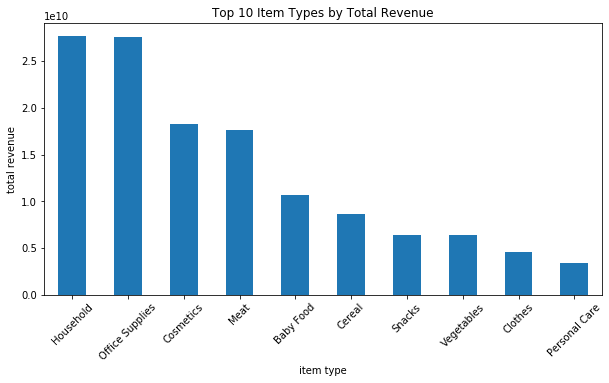

In [22]:
# Calculate total revenue per item type
top_products = (df.groupby("item type")["total revenue"].sum().sort_values(ascending=False).head(10))

# Plot
plt.figure(figsize=(10,5))
top_products.plot(kind="bar")
plt.title("Top 10 Item Types by Total Revenue")
plt.xlabel("item type")
plt.ylabel("total revenue")
plt.xticks(rotation=45)
plt.show()

**Conclusion:**  
From the chart, it can be observed that *Household* and *Office Supplies*
generate the highest total revenue among all item types.
These two categories contribute significantly more than the rest,
indicating strong and consistent demand.

On the other hand, categories such as *Clothes* and *Personal Care*
generate relatively lower revenue.
This suggests that sales performance varies considerably across item types,
and focusing on high-performing categories could help maximize overall revenue.


### Q2. Which regions generate the highest total revenue?


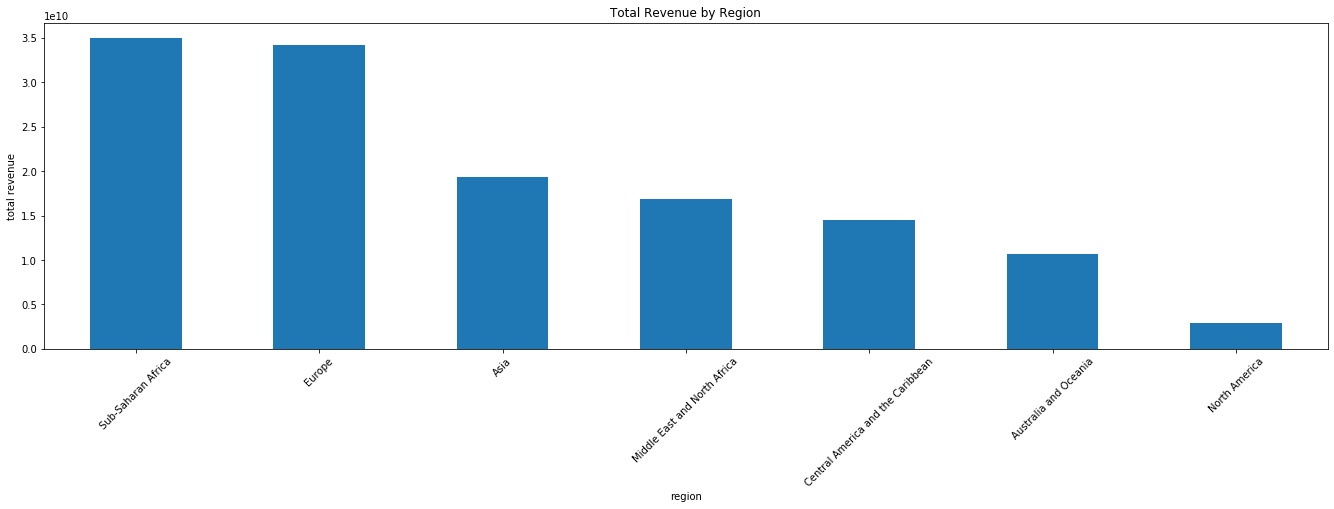

In [23]:
# Calculate total revenue per region
region_revenue = (df.groupby("region")["total revenue"].sum().sort_values(ascending=False))

# Plot
plt.figure(figsize=(23,6))
region_revenue.plot(kind="bar")

plt.title("Total Revenue by Region")
plt.xlabel("region")
plt.ylabel("total revenue")
plt.xticks(rotation=45)
plt.show()

**Conclusion:**  
The chart shows that some regions generate significantly higher total
revenue compared to others.
This indicates that sales performance varies by region, which may be
influenced by market size, customer demand, or regional distribution strategies.

### Q3. How does total revenue change over time?

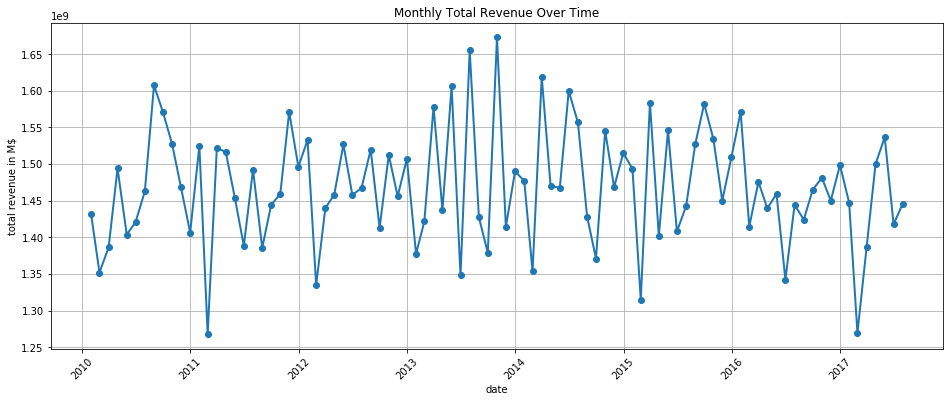

In [24]:
# Convert Order Date to datetime
df["order date"] = pd.to_datetime(df["order date"])

# Aggregate total revenue by month
monthly_revenue = (df.set_index("order date").resample("M")["total revenue"].sum())

# Clear line chart with visible points
plt.figure(figsize=(16,6))
plt.plot(monthly_revenue.index,monthly_revenue.values,marker='o',linewidth=2,markersize=6)
plt.title("Monthly Total Revenue Over Time")
plt.xlabel("date")
plt.ylabel("total revenue in M$")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

**Conclusion:**  
The line chart shows that total revenue fluctuates over time rather than
following a steady upward or downward trend.
Revenue values remain within a relatively consistent range, with several
noticeable peaks and drops across different periods.

These fluctuations may indicate the presence of seasonal effects or changes
in demand over time, but overall the revenue level appears to be stable
throughout the observed period.

### Q4. Which sales channel generates higher total revenue?

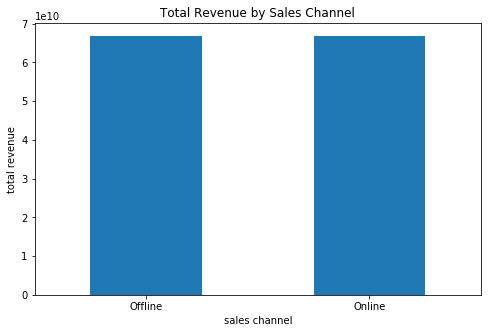

In [25]:
# Total revenue by sales channel
channel_revenue = (df.groupby("sales channel")["total revenue"].sum())

plt.figure(figsize=(8,5))
channel_revenue.plot(kind="bar")

plt.title("Total Revenue by Sales Channel")
plt.xlabel("sales channel")
plt.ylabel("total revenue")
plt.xticks(rotation=0)
plt.show()

**Conclusion:**  
The chart shows a clear difference in total revenue between the sales channels.
One channel generates significantly higher revenue than the other,
indicating that the sales channel plays an important role in overall performance.

### Q5: Which product categories contribute the most to total sales?

In [26]:
# Q5 – Total sales by product category
category_sales = (
    df.groupby("item type")["total revenue"]
      .sum()
      .sort_values(ascending=False)
)

category_sales.head()

item type
Household          2.770567e+10
Office Supplies    2.754184e+10
Cosmetics          1.832938e+10
Meat               1.761195e+10
Baby Food          1.069920e+10
Name: total revenue, dtype: float64

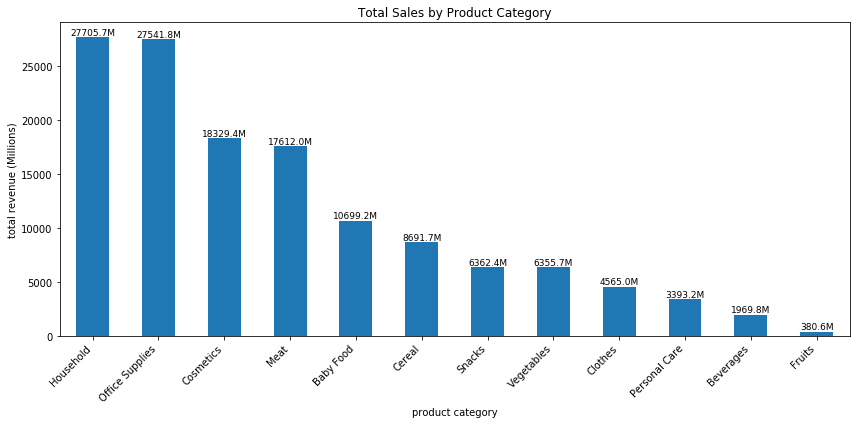

In [27]:
plt.figure(figsize=(12,6))
ax = (category_sales / 1e6).plot(kind="bar")

for i, value in enumerate(category_sales / 1e6):
    ax.text(
        i, 
        value, 
        f"{value:.1f}M", 
        ha="center", 
        va="bottom", 
        fontsize=9)

plt.title("Total Sales by Product Category")
plt.xlabel("product category")
plt.ylabel("total revenue (Millions)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Conclusion:**  
Total sales are largely driven by a small number of product categories. Household and Office Supplies are the top contributors, generating the highest total revenue by a wide margin, followed by Cosmetics and Meat. In contrast, categories such as Beverages and Fruits contribute relatively little to overall sales. This indicates a concentrated sales structure, where a few categories account for most of the revenue at this stage of the project.

### Q6. What is the average order value per region?

In [28]:
#Average Order Value per Region
aov_region = (df.groupby("region").agg(total_revenue=("total revenue", "sum"),order_count=("order id", "nunique")))
aov_region["AOV"] = aov_region["total_revenue"] / aov_region["order_count"]
aov_region

,total_revenue,order_count,AOV
region,,,
Asia,1.929340e+10,14547,1.326280e+06
Australia and Oceania,1.070152e+10,8113,1.319059e+06
Central America and the Caribbean,1.455373e+10,10731,1.356232e+06
Europe,3.424115e+10,25877,1.323227e+06
Middle East and North Africa,1.692141e+10,12580,1.345104e+06
North America,2.937002e+09,2133,1.376935e+06
Sub-Saharan Africa,3.495845e+10,26019,1.343574e+06


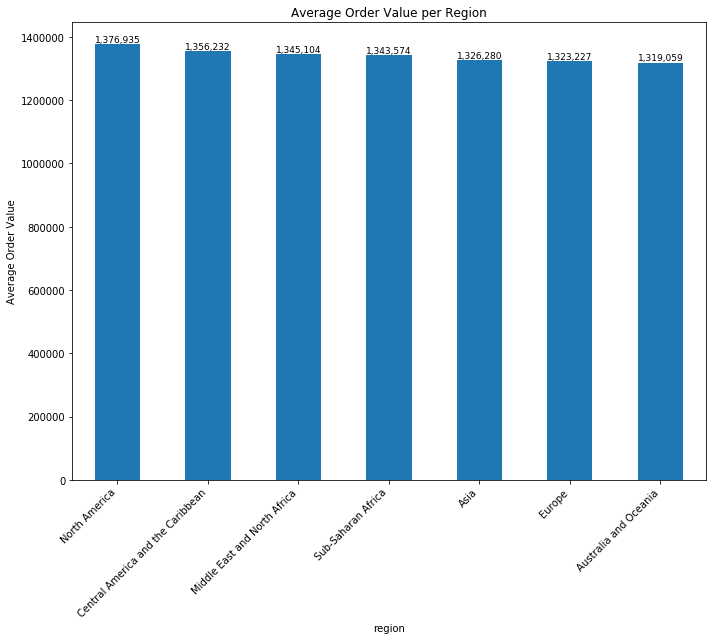

In [29]:
plt.figure(figsize=(10,9))
ax = aov_region["AOV"].sort_values(ascending=False).plot(kind="bar")

for i, value in enumerate(aov_region["AOV"].sort_values(ascending=False)):
    ax.text(
        i,
        value,
        f"{value:,.0f}",
        ha="center",
        va="bottom",
        fontsize=9
    )
plt.title("Average Order Value per Region")
plt.xlabel("region")
plt.ylabel("Average Order Value")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

**Conclusion:**

The average order value is relatively consistent across regions, with only modest variation. North America records the highest average order value, while Australia and Oceania shows the lowest. Overall, the narrow range suggests broadly similar purchasing behavior across regions at this stage of the analysis.